Análisis Exploratorio de Datos - Ventas Licorera "El Buen Gusto"

Este notebook contiene el análisis exploratorio de los datos de ventas de la licorera "El Buen Gusto" para el período 2022-2024.

Estructura del Análisis:
1. **Análisis descriptivo básico**
   - Resumen estadístico de variables numéricas
   - Distribución de ventas por categoría de producto
   - Identificación de productos top y de menor rotación

2. **Análisis temporal**
   - Tendencias de ventas mensuales y anuales
   - Patrones estacionales por categoría de producto
   - Impacto de eventos especiales en las ventas

3. **Análisis geográfico y operacional**
   - Performance por sucursal y zona
   - Correlación entre factores climáticos y ventas
   - Efectividad de promociones


1. Configuración inicial

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Carga de datos
df = pd.read_csv('../data/ventas_licorera.csv', parse_dates=['fecha'])

# Información básica del dataset
print("Información del dataset:")
print(f"- Período: {df['fecha'].min().date()} a {df['fecha'].max().date()}")
print(f"- Total registros: {len(df):,}")
print(f"- Sucursales: {df['sucursal_id'].nunique()}")
print(f"- Productos únicos: {df['nombre_producto'].nunique()}")
print(f"- Ventas totales: ${df['total_venta'].sum():,.2f}")

# Verificación inicial
print(f"\nDimensiones del dataset: {df.shape}")
print("\nPrimeras filas:")
display(df.head(3))

Información del dataset:
- Período: 2022-01-01 a 2024-12-31
- Total registros: 186,489
- Sucursales: 15
- Productos únicos: 26
- Ventas totales: $24,621,438.53

Dimensiones del dataset: (186489, 14)

Primeras filas:


,fecha,sucursal_id,categoria_producto,nombre_producto,precio_unitario,cantidad_vendida,total_venta,dia_semana,mes,promocion_activa,evento_especial,temperatura_promedio,lluvia,zona_sucursal
0,2022-01-01,1,Cerveza,Club Colombia 330ml,3.20,32,102.40,6,1,1,Año_Nuevo,26.50,0,Norte
1,2022-01-01,1,Bebidas_Preparadas,Smirnoff Ice 275ml,4.20,28,117.60,6,1,1,Año_Nuevo,26.50,0,Norte
2,2022-01-01,1,Cerveza,Corona 355ml,5.20,26,135.20,6,1,0,Año_Nuevo,26.50,0,Norte


2. Análisis Descriptivo Básico

In [4]:
#Resumen estadístico de variables numéricas
print("Estadísticas Clave de Valores Numéricos:")
num_cols = ['precio_unitario', 'cantidad_vendida', 'total_venta', 'temperatura_promedio']

# Renombrar columnas para mayor claridad
df_stats = df[num_cols].describe().T
df_stats = df_stats.rename(columns={
    'count': 'Registros',
    'mean': 'Promedio',
    'std': 'Desviación Estándar',
    'min': 'Mínimo',
    '25%': 'Percentil 25%',
    '50%': 'Mediana',
    '75%': 'Percentil 75%',
    'max': 'Máximo'
})

display(df_stats.style.background_gradient(cmap='Blues'))


Estadísticas Clave de Valores Numéricos:


,Registros,Promedio,Desviación Estándar,Mínimo,Percentil 25%,Mediana,Percentil 75%,Máximo
precio_unitario,186489.000000,17.965515,25.942068,2.500000,4.730000,7.140000,19.840000,132.300000
cantidad_vendida,186489.000000,11.635260,6.688735,1.000000,6.000000,11.000000,16.000000,67.000000
total_venta,186489.000000,132.026224,157.472424,4.200000,55.560000,88.000000,138.600000,3439.800000
temperatura_promedio,186489.000000,23.957414,2.897399,14.800000,22.000000,24.000000,26.000000,32.200000


In [5]:
print("\nDistribución Porcentual de Categorías:")

cat_cols = ['categoria_producto', 'nombre_producto', 'dia_semana', 'mes', 
            'promocion_activa', 'evento_especial', 'lluvia', 'zona_sucursal']

for col in cat_cols:
    # Mapear nombres más entendibles
    col_name = {
        'categoria_producto': 'Categoría de Producto',
        'nombre_producto': 'Producto Más Vendido',
        'dia_semana': 'Día de la Semana',
        'mes': 'Mes del Año',
        'promocion_activa': '¿Hubo Promoción?',
        'evento_especial': 'Evento Especial',
        'lluvia': '¿Llovió?',
        'zona_sucursal': 'Zona de la Sucursal'
    }.get(col, col)
    
    # Calcular proporción y mostrar top 10
    freq_table = df[col].value_counts(normalize=True).head(10).to_frame()
    freq_table.columns = ['Porcentaje de Ocurrencia']
    
    # Formatear como porcentaje
    freq_table['Porcentaje de Ocurrencia'] = (freq_table['Porcentaje de Ocurrencia'] * 100).round(2).astype(str) + '%'
    
    print(f"\n🔹 {col_name}:")
    display(freq_table.style.background_gradient(cmap='Greens', subset=['Porcentaje de Ocurrencia'],vmin=0, vmax=100,
                                              gmap=freq_table['Porcentaje de Ocurrencia'].str.rstrip('%').astype(float),
                                              text_color_threshold=0.5))


Distribución Porcentual de Categorías:

🔹 Categoría de Producto:


,Porcentaje de Ocurrencia
categoria_producto,
Cerveza,49.77%
Licores,25.11%
Vinos,15.1%
Bebidas_Preparadas,10.02%



🔹 Producto Más Vendido:


,Porcentaje de Ocurrencia
nombre_producto,
Tres Cordilleras IPA 330ml,6.29%
Aguila 330ml,6.27%
Club Colombia 330ml,6.25%
Corona 355ml,6.22%
BBC Cajica 330ml,6.21%
Pilsen 330ml,6.2%
Heineken 330ml,6.16%
Stella Artois 330ml,6.15%
Tequila Jose Cuervo 750ml,3.17%



🔹 Día de la Semana:


,Porcentaje de Ocurrencia
dia_semana,
6,19.36%
5,16.66%
7,15.16%
2,12.42%
1,12.36%
3,12.14%
4,11.9%



🔹 Mes del Año:


,Porcentaje de Ocurrencia
mes,
12,11.95%
6,9.07%
8,8.99%
7,8.99%
5,8.05%
3,7.93%
4,7.81%
10,7.74%
1,7.67%



🔹 ¿Hubo Promoción?:


,Porcentaje de Ocurrencia
promocion_activa,
0,84.04%
1,15.96%



🔹 Evento Especial:


,Porcentaje de Ocurrencia
evento_especial,
Ninguno,93.64%
Pascua,1.37%
Navidad,1.15%
Año_Nuevo,1.07%
Dia_Padre,1.01%
Dia_Madre,0.93%
Halloween,0.42%
San_Valentin,0.41%



🔹 ¿Llovió?:


,Porcentaje de Ocurrencia
lluvia,
0,80.28%
1,19.72%



🔹 Zona de la Sucursal:


,Porcentaje de Ocurrencia
zona_sucursal,
Centro,23.83%
Norte,20.46%
Oeste,18.63%
Sur,18.61%
Este,18.47%


Distribución de ventas por categoría de producto:


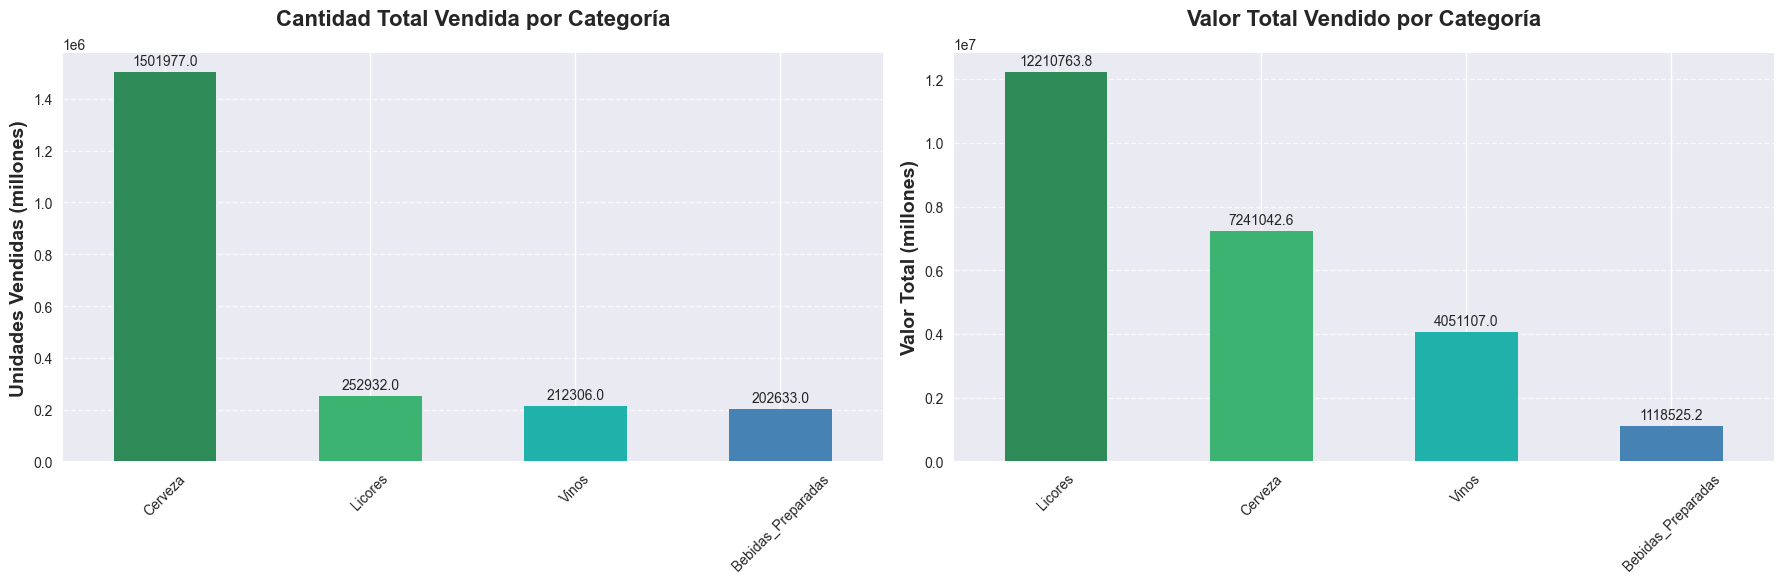

In [6]:
print("Distribución de ventas por categoría de producto:")

# Configurar paleta corporativa profesional
corporate_palette = ["#2E8B57", "#3CB371", "#20B2AA", "#4682B4"]  # Verde marino, verde medio, verde azulado, azul acero

# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras para cantidad vendida
cat_quantity = df.groupby('categoria_producto')['cantidad_vendida'].sum().sort_values(ascending=False)
cat_quantity.plot(kind='bar', ax=ax1, color=corporate_palette)
ax1.set_title('Cantidad Total Vendida por Categoría', pad=20, fontweight='bold')
ax1.set_ylabel('Unidades Vendidas (millones)', fontweight='bold')
ax1.set_xlabel('')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de barras para valor total
cat_value = df.groupby('categoria_producto')['total_venta'].sum().sort_values(ascending=False)
cat_value.plot(kind='bar', ax=ax2, color=corporate_palette)
ax2.set_title('Valor Total Vendido por Categoría', pad=20, fontweight='bold')
ax2.set_ylabel('Valor Total (millones)', fontweight='bold')
ax2.set_xlabel('')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f', padding=3, fontsize=10)
    
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
# Identificación de productos top y de menor rotacións
print("Análisis de productos destacados y de bajo rendimiento")

# Agrupación y cálculo de métricas clave
product_stats = df.groupby(['categoria_producto', 'nombre_producto']).agg(
    cantidad_total=('cantidad_vendida', 'sum'),  # Total de unidades vendidas
    valor_total=('total_venta', 'sum'),          # Valor total generado ($)
    precio_promedio=('precio_unitario', 'mean'), # Precio promedio del producto
    frecuencia_ventas=('nombre_producto', 'count') # Veces que apareció en transacciones
).reset_index()

# 1. PRODUCTOS TOP POR CANTIDAD (Los más vendidos en unidades)
print("\nTOP 5 - PRODUCTOS MÁS VENDIDOS (por cantidad de unidades):")
top_cantidad = (product_stats
               .sort_values('cantidad_total', ascending=False)
               .head(5)
               .reset_index(drop=True))
top_cantidad.index = top_cantidad.index + 1  # Numeración 1-5

display(top_cantidad.style
       .background_gradient(cmap='Greens', subset=['cantidad_total'])
       .format({
           'cantidad_total': '{:,.0f} unidades',
           'valor_total': '${:,.2f}',
           'precio_promedio': '${:.2f}'
       })
       .set_caption("Productos con mayor volumen de ventas"))

# 2. PRODUCTOS TOP POR VALOR (Los que generan más ingresos)
print("\nTOP 5 - PRODUCTOS MÁS RENTABLES (por valor generado):")
top_valor = (product_stats
            .sort_values('valor_total', ascending=False)
            .head(5)
            .reset_index(drop=True))
top_valor.index = top_valor.index + 1

display(top_valor.style
       .background_gradient(cmap='Blues', subset=['valor_total'])
       .format({
           'valor_total': '${:,.2f}',
           'cantidad_total': '{:,.0f} unidades',
           'precio_promedio': '${:.2f}'
       })
       .set_caption("Productos que generan mayor valor económico"))

# 3. PRODUCTOS BOTTOM POR CANTIDAD (Los menos vendidos)
print("\nBOTTOM 5 - PRODUCTOS DE MENOR ROTACIÓN (por cantidad):")
bottom_cantidad = (product_stats
                  .sort_values('cantidad_total')
                  .head(5)
                  .reset_index(drop=True))
bottom_cantidad.index = bottom_cantidad.index + 1

display(bottom_cantidad.style
       .background_gradient(cmap='Reds', subset=['cantidad_total'])
       .format({
           'cantidad_total': '{:,.0f} unidades',
           'valor_total': '${:,.2f}',
           'precio_promedio': '${:.2f}'
       })
       .set_caption("Productos con menor movimiento en inventario"))

# 4. ANÁLISIS COMPARATIVO
print("\nRESUMEN COMPARATIVO:")
print(f"- Producto más vendido: {top_cantidad.iloc[0]['nombre_producto']} ({top_cantidad.iloc[0]['cantidad_total']:,.0f} unidades)")
print(f"- Producto más rentable: {top_valor.iloc[0]['nombre_producto']} (${top_valor.iloc[0]['valor_total']:,.2f})")
print(f"- Producto con menor rotación: {bottom_cantidad.iloc[0]['nombre_producto']} (solo {bottom_cantidad.iloc[0]['cantidad_total']:,.0f} unidades vendidas)")
print(f"- Diferencia entre TOP y BOTTOM: {top_cantidad.iloc[0]['cantidad_total']/bottom_cantidad.iloc[0]['cantidad_total']:,.1f}x más ventas")

Análisis de productos destacados y de bajo rendimiento



TOP 5 - PRODUCTOS MÁS VENDIDOS (por cantidad de unidades):


,categoria_producto,nombre_producto,cantidad_total,valor_total,precio_promedio,frecuencia_ventas
1,Cerveza,Tres Cordilleras IPA 330ml,"189,637 unidades","$1,434,953.86",$7.57,11735
2,Cerveza,Club Colombia 330ml,"189,307 unidades","$636,590.90",$3.36,11662
3,Cerveza,Aguila 330ml,"189,267 unidades","$557,340.30",$2.94,11699
4,Cerveza,BBC Cajica 330ml,"187,988 unidades","$1,283,864.97",$6.83,11587
5,Cerveza,Pilsen 330ml,"187,695 unidades","$493,233.60",$2.63,11570



TOP 5 - PRODUCTOS MÁS RENTABLES (por valor generado):


,categoria_producto,nombre_producto,cantidad_total,valor_total,precio_promedio,frecuencia_ventas
1,Licores,Whisky Buchanans 750ml,"31,511 unidades","$3,969,927.60",$126.05,5829
2,Licores,Whisky Old Parr 750ml,"31,511 unidades","$2,813,104.51",$89.31,5852
3,Licores,Tequila Jose Cuervo 750ml,"32,392 unidades","$1,531,831.49",$47.30,5914
4,Cerveza,Tres Cordilleras IPA 330ml,"189,637 unidades","$1,434,953.86",$7.57,11735
5,Cerveza,BBC Cajica 330ml,"187,988 unidades","$1,283,864.97",$6.83,11587



BOTTOM 5 - PRODUCTOS DE MENOR ROTACIÓN (por cantidad):


,categoria_producto,nombre_producto,cantidad_total,valor_total,precio_promedio,frecuencia_ventas
1,Licores,Ron Bacardi 750ml,"30,987 unidades","$928,120.18",$29.96,5802
2,Licores,Vodka Smirnoff 750ml,"31,423 unidades","$1,057,368.80",$33.65,5870
3,Licores,Whisky Buchanans 750ml,"31,511 unidades","$3,969,927.60",$126.05,5829
4,Licores,Whisky Old Parr 750ml,"31,511 unidades","$2,813,104.51",$89.31,5852
5,Licores,Aguardiente Antioqueno 750ml,"31,539 unidades","$613,917.51",$19.46,5826



RESUMEN COMPARATIVO:
- Producto más vendido: Tres Cordilleras IPA 330ml (189,637 unidades)
- Producto más rentable: Whisky Buchanans 750ml ($3,969,927.60)
- Producto con menor rotación: Ron Bacardi 750ml (solo 30,987 unidades vendidas)
- Diferencia entre TOP y BOTTOM: 6.1x más ventas


3. Análisis Temporal

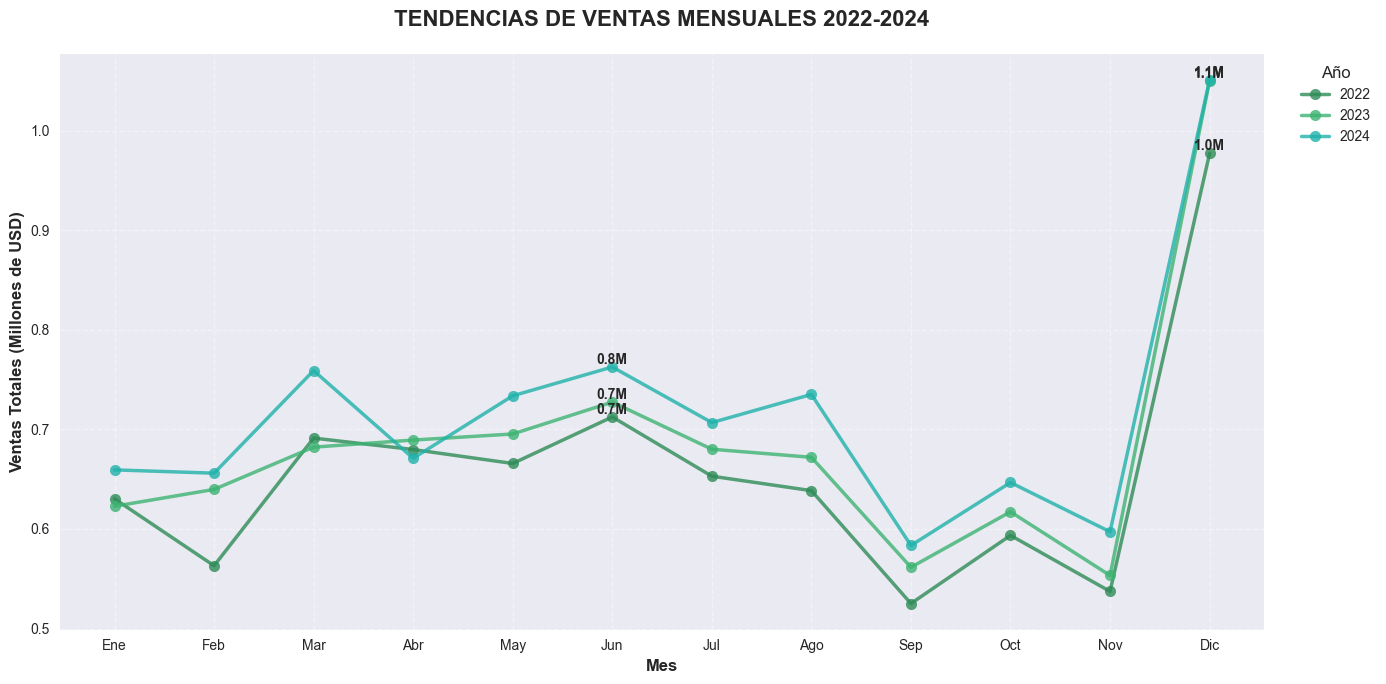

In [9]:
# Tendencias de ventas mensuales y anuales
# Configuración de estilo profesional
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Preparación de datos
df['año'] = df['fecha'].dt.year
monthly_sales = df.groupby(['año', 'mes'])['total_venta'].sum().unstack('año') / 1e6  # Convertir a millones

# Gráfico de tendencias
ax = monthly_sales.plot(
    marker='o',
    linewidth=2.5,
    markersize=8,
    color=['#2E8B57', '#3CB371', '#20B2AA'],  # Verde profesional, verde agua, verde azulado
    alpha=0.8
)

# Personalizacion
plt.title('TENDENCIAS DE VENTAS MENSUALES 2022-2024', pad=20, fontweight='bold')
plt.ylabel('Ventas Totales (Millones de USD)', fontweight='bold')
plt.xlabel('Mes', fontweight='bold')
plt.xticks(range(1, 13), 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, linestyle='--', alpha=0.4)

# Añadir etiquetas de valor para puntos clave
for year in monthly_sales.columns:
    for month in [6, 12]:  # Destacar junio y diciembre
        y_val = monthly_sales.loc[month, year]
        ax.text(month, y_val, f'{y_val:.1f}M', 
                ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

# Leyenda mejorada
plt.legend(title='Año', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


Patrones estacionales por categoría de producto


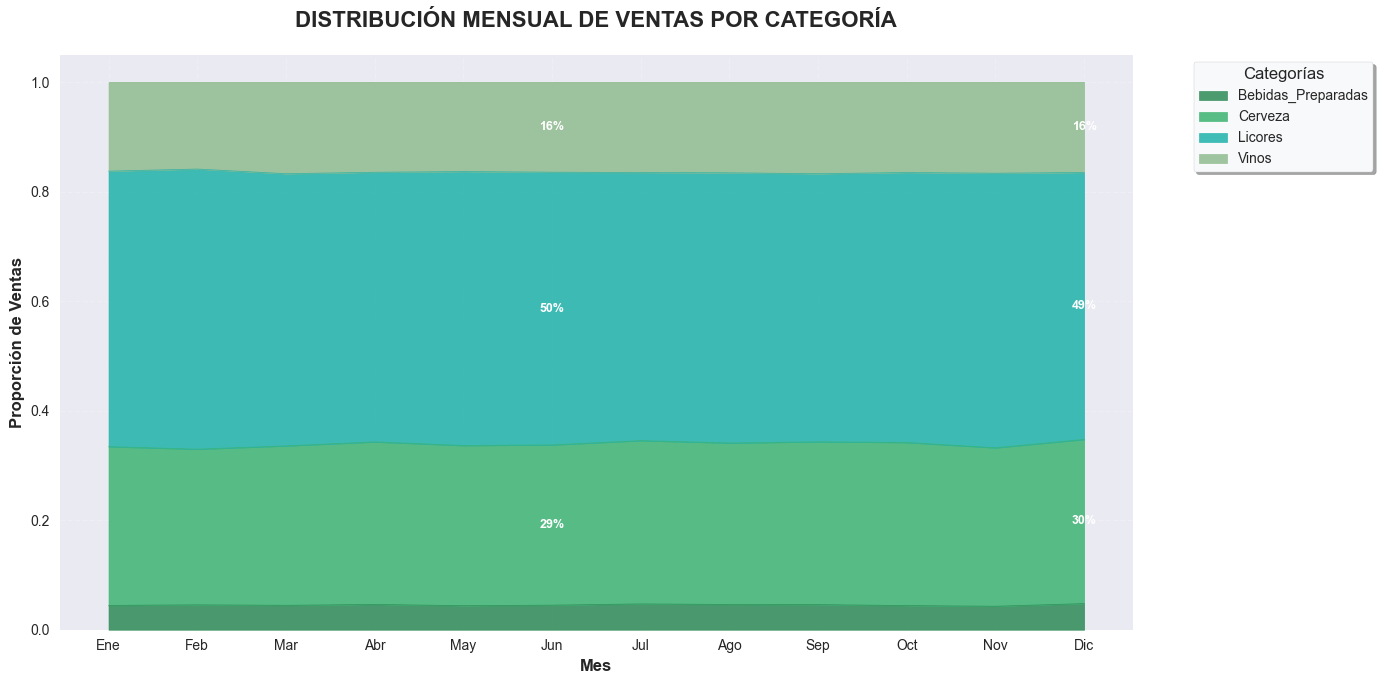

In [10]:
# Patrones estacionales por categoría de producto
# Configuración de estilo
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("Patrones estacionales por categoría de producto")

green_palette = [
    '#2E8B57',  # SeaGreen - para Cervezas
    '#3CB371',  # MediumSeaGreen - para Licores
    '#20B2AA',  # LightSeaGreen - para Vinos
    '#8FBC8F'   # DarkSeaGreen - para Bebidas Preparadas
]

# Agrupar y normalizar datos
monthly_cat = df.groupby(['mes', 'categoria_producto'])['total_venta'].sum().unstack('categoria_producto')
monthly_cat_norm = monthly_cat.div(monthly_cat.sum(axis=1), axis=0)

ax = monthly_cat_norm.plot(
    kind='area',
    stacked=True,
    alpha=0.85,
    color=green_palette,
    linewidth=0.5
)

# Personalizacion
plt.title('DISTRIBUCIÓN MENSUAL DE VENTAS POR CATEGORÍA', 
          pad=20, fontweight='bold', fontsize=16)
plt.ylabel('Proporción de Ventas', fontweight='bold')
plt.xlabel('Mes', fontweight='bold')
plt.xticks(range(1, 13), 
           ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, linestyle='--', alpha=0.2)

# Leyenda
legend = plt.legend(
    title='Categorías',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)
legend.get_frame().set_facecolor('#f8f9fa')

# Añadir etiquetas en puntos clave
for month in [6, 12]:  # Destacar junio y diciembre
    for i, category in enumerate(monthly_cat_norm.columns):
        y_val = monthly_cat_norm.loc[month, category]
        if y_val > 0.1:  # Solo etiquetar categorías significativas
            ax.text(month, monthly_cat_norm.loc[month].iloc[:i+1].sum() - y_val/2,
                   f"{y_val:.0%}",
                   ha='center', va='center',
                   fontsize=9, fontweight='bold',
                   color='white')

plt.tight_layout()
plt.show()

IMPACTO DE EVENTOS ESPECIALES EN VENTAS

COMPARATIVO DE MÉTRICAS CLAVE:


,venta_promedio,cantidad_promedio,transacciones,incremento_venta
San_Valentin,$280.6,23.7 unidades,763,126.1%
Dia_Madre,$256.0,21.3 unidades,"1,732",106.3%
Año_Nuevo,$247.5,21.8 unidades,"2,000",99.4%
Dia_Padre,$245.8,22.2 unidades,"1,882",98.0%
Halloween,$245.1,21.4 unidades,788,97.5%
Pascua,$244.5,21.9 unidades,"2,547",97.0%
Navidad,$242.1,21.5 unidades,"2,145",95.1%
Días normales,$124.1,10.9 unidades,"174,632",0.0%


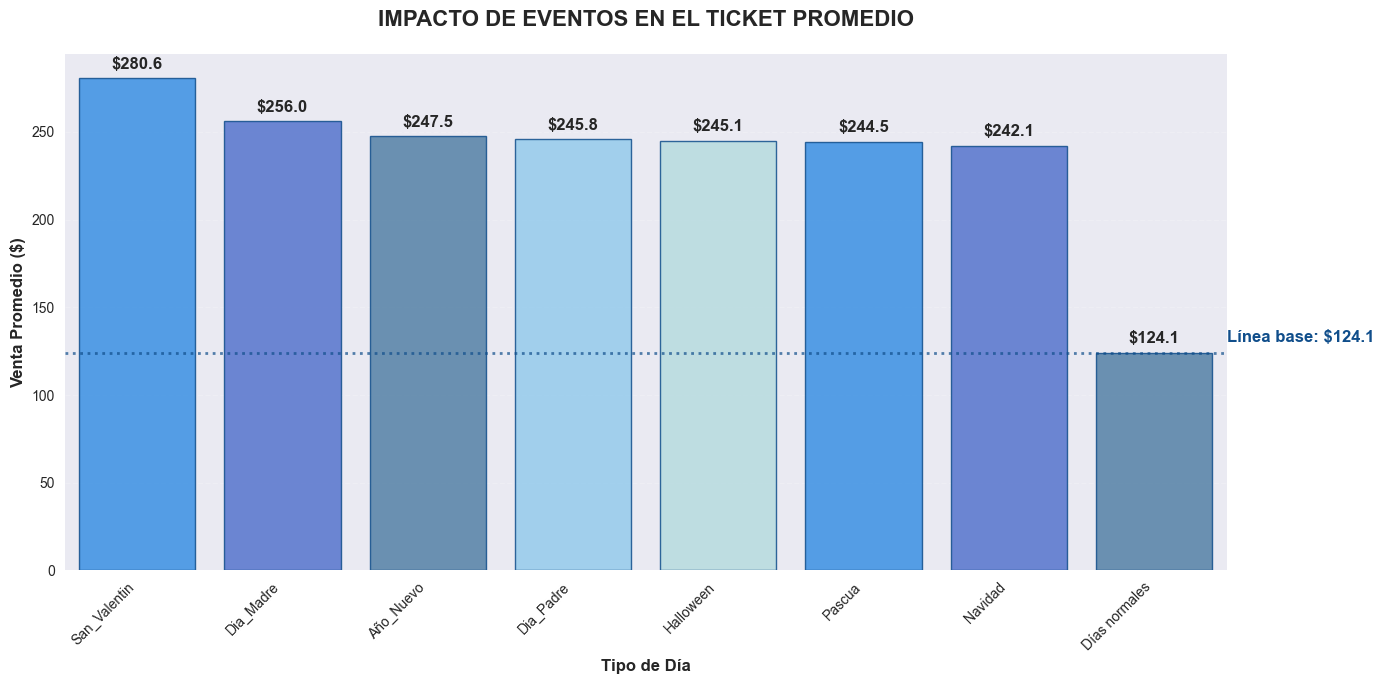

In [11]:
#IMPACTO DE EVENTOS ESPECIALES EN VENTAS
#Configuración de estilo
sns.set_palette("Blues_d")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("IMPACTO DE EVENTOS ESPECIALES EN VENTAS")

# Paleta de azules profesionales
blue_palette = [
    '#1E90FF',  # DodgerBlue - para eventos principales
    '#4169E1',  # RoyalBlue
    '#4682B4',  # SteelBlue
    '#87CEFA',  # LightSkyBlue
    '#B0E0E6',  # PowderBlue - para días normales
]

# Preparación de datos
event_days = df[df['evento_especial'] != 'Ninguno']
normal_days = df[df['evento_especial'] == 'Ninguno']

event_stats = event_days.groupby('evento_especial').agg(
    venta_promedio=('total_venta', 'mean'),
    cantidad_promedio=('cantidad_vendida', 'mean'),
    transacciones=('evento_especial', 'count')
).sort_values('venta_promedio', ascending=False)

normal_stats = pd.DataFrame({
    'venta_promedio': normal_days['total_venta'].mean(),
    'cantidad_promedio': normal_days['cantidad_vendida'].mean(),
    'transacciones': len(normal_days)
}, index=['Días normales'])

comparison = pd.concat([event_stats, normal_stats])

# Gráfico comparativo
fig, ax = plt.subplots(figsize=(14, 7))

# Barras
bars = sns.barplot(
    x=comparison.index,
    y='venta_promedio',
    data=comparison,
    palette=blue_palette[:len(comparison)],
    alpha=0.85,
    edgecolor='#104E8B',
    linewidth=1
)

plt.title('IMPACTO DE EVENTOS EN EL TICKET PROMEDIO', 
         pad=20, fontweight='bold', fontsize=16)
plt.ylabel('Venta Promedio ($)', fontweight='bold')
plt.xlabel('Tipo de Día', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.2)

for p in bars.patches:
    ax.annotate(f"${p.get_height():.1f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 10), 
               textcoords='offset points',
               fontweight='bold')

# Línea de referencia (días normales)
normal_value = normal_stats['venta_promedio'].values[0]
plt.axhline(normal_value, color='#104E8B', linestyle=':', linewidth=2, alpha=0.7)
plt.text(len(comparison)-0.5, normal_value*1.05, 
        f'Línea base: ${normal_value:.1f}', 
        color='#104E8B', fontweight='bold')

print("\nCOMPARATIVO DE MÉTRICAS CLAVE:")
comparison_display = comparison.copy()
comparison_display['incremento_venta'] = ((comparison['venta_promedio'] / normal_value - 1) * 100).round(1)
display(comparison_display.style
       .format({
           'venta_promedio': '${:.1f}',
           'cantidad_promedio': '{:.1f} unidades',
           'transacciones': '{:,.0f}',
           'incremento_venta': '{:.1f}%'
       })
       .background_gradient(cmap='Blues', subset=['venta_promedio', 'incremento_venta'])
       .set_caption('Impacto comparativo de eventos especiales'))

plt.tight_layout()
plt.show()

4. Análisis Geográfico y Operacional

In [12]:
# Performance por sucursal y zona
print("Performance por sucursal y zona:")

# Agrupar por zona
zone_perf = df.groupby('zona_sucursal').agg(
    ventas_totales=('total_venta', 'sum'),
    transacciones=('total_venta', 'count'),
    ticket_promedio=('total_venta', 'mean')
).sort_values('ventas_totales', ascending=False)

# Agrupar por sucursal
store_perf = df.groupby(['zona_sucursal', 'sucursal_id']).agg(
    ventas_totales=('total_venta', 'sum'),
    transacciones=('total_venta', 'count'),
    ticket_promedio=('total_venta', 'mean')
).sort_values('ventas_totales', ascending=False)

# Mostrar resultados
print("\nPerformance por Zona:")
display(zone_perf.style.background_gradient(cmap='Blues'))

print("\nTop 5 Sucursales por Ventas:")
display(store_perf.head(5).style.background_gradient(cmap='Greens'))

Performance por sucursal y zona:

Performance por Zona:


,ventas_totales,transacciones,ticket_promedio
zona_sucursal,,,
Centro,5858096.380000,44442,131.814418
Norte,5009080.980000,38151,131.296191
Sur,4624011.360000,34711,133.214582
Oeste,4576835.230000,34745,131.726442
Este,4553414.580000,34440,132.212967



Top 5 Sucursales por Ventas:


PERFORMANCE DE VENTAS POR ZONA GEOGRÁFICA

ESTADÍSTICAS CLAVE POR ZONA:


,Transacciones,Promedio,Mediana,Desviación
zona_sucursal,,,,
Centro,"44,442",$131.8,$88.0,$156.3
Norte,"38,151",$131.3,$88.0,$157.7
Sur,"34,711",$133.2,$88.2,$159.4
Este,"34,440",$132.2,$88.2,$156.2
Oeste,"34,745",$131.7,$87.4,$158.1


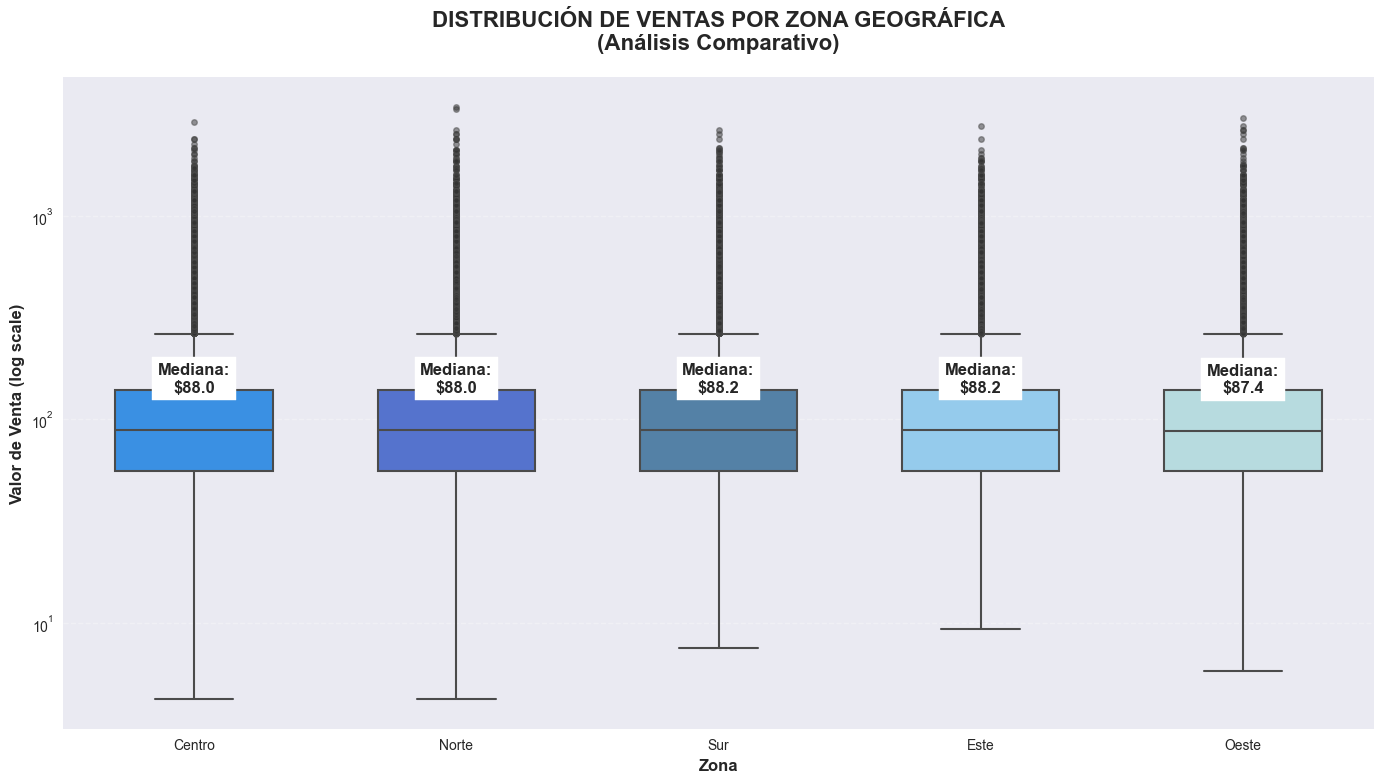

In [13]:
# Visualización de performance por zona

sns.set_palette("Blues_d")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("PERFORMANCE DE VENTAS POR ZONA GEOGRÁFICA")

# Por importancia
zone_palette = {
    'Centro': '#1E90FF',  # Azul más intenso para la zona más importante
    'Norte': '#4169E1',
    'Sur': '#4682B4', 
    'Este': '#87CEFA',
    'Oeste': '#B0E0E6'   # Azul más claro para la zona menos relevante
}

# gráfico de cajas
plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x='zona_sucursal', 
    y='total_venta', 
    data=df, 
    order=['Centro', 'Norte', 'Sur', 'Este', 'Oeste'],
    palette=zone_palette.values(),
    width=0.6,
    linewidth=1.5,
    flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': '#333333', 'alpha': 0.5}
)

plt.title('DISTRIBUCIÓN DE VENTAS POR ZONA GEOGRÁFICA\n(Análisis Comparativo)', 
          pad=20, fontweight='bold', fontsize=16)
plt.ylabel('Valor de Venta (log scale)', fontweight='bold')
plt.xlabel('Zona', fontweight='bold')
plt.yscale('log')  # Escala logarítmica para mejor visualización de outliers

#líneas de referencia y anotaciones
median_values = df.groupby('zona_sucursal')['total_venta'].median().sort_values(ascending=False)
for i, zone in enumerate(['Centro', 'Norte', 'Sur', 'Este', 'Oeste']):
    plt.text(i, median_values[zone]*1.8, f'Mediana:\n${median_values[zone]:.1f}', 
             ha='center', va='center', fontweight='bold', backgroundcolor='white')

plt.grid(axis='y', linestyle='--', alpha=0.3)

# tabla resumen
zone_stats = df.groupby('zona_sucursal')['total_venta'].agg(['count', 'mean', 'median', 'std'])
zone_stats = zone_stats.loc[['Centro', 'Norte', 'Sur', 'Este', 'Oeste']]
zone_stats.columns = ['Transacciones', 'Promedio', 'Mediana', 'Desviación']

print("\nESTADÍSTICAS CLAVE POR ZONA:")
display(zone_stats.style
       .format({
           'Transacciones': '{:,.0f}',
           'Promedio': '${:,.1f}',
           'Mediana': '${:,.1f}',
           'Desviación': '${:,.1f}'
       })
       .background_gradient(cmap='Blues', subset=['Promedio', 'Mediana'])
       .set_caption('Métricas de ventas por zona geográfica'))

plt.tight_layout()
plt.show()

Correlación entre factores climáticos y ventas:


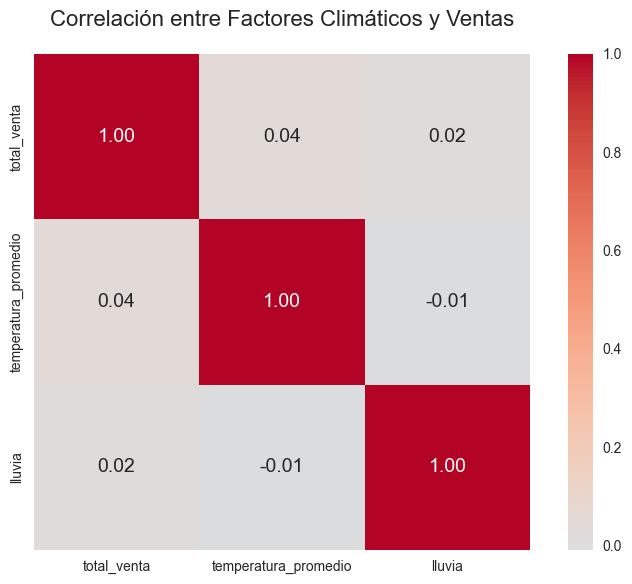

In [14]:
# Correlación entre factores climáticos y ventas
print("Correlación entre factores climáticos y ventas:")

# Calcular correlaciones
weather_corr = df[['total_venta', 'temperatura_promedio', 'lluvia']].corr()

# Mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', center=0, 
            annot_kws={"size": 14}, fmt='.2f', square=True)
plt.title('Correlación entre Factores Climáticos y Ventas', pad=20)
plt.tight_layout()
plt.show()

Efectividad de promociones:

Comparación de días con y sin promoción:


,venta_promedio,cantidad_promedio,frecuencia
promocion_activa,,,
0,130.705578,11.518206,156733
1,138.982428,12.251815,29756



Incremento promedio con promociones:
- Ventas: 6.3%
- Cantidad vendida: 6.4%


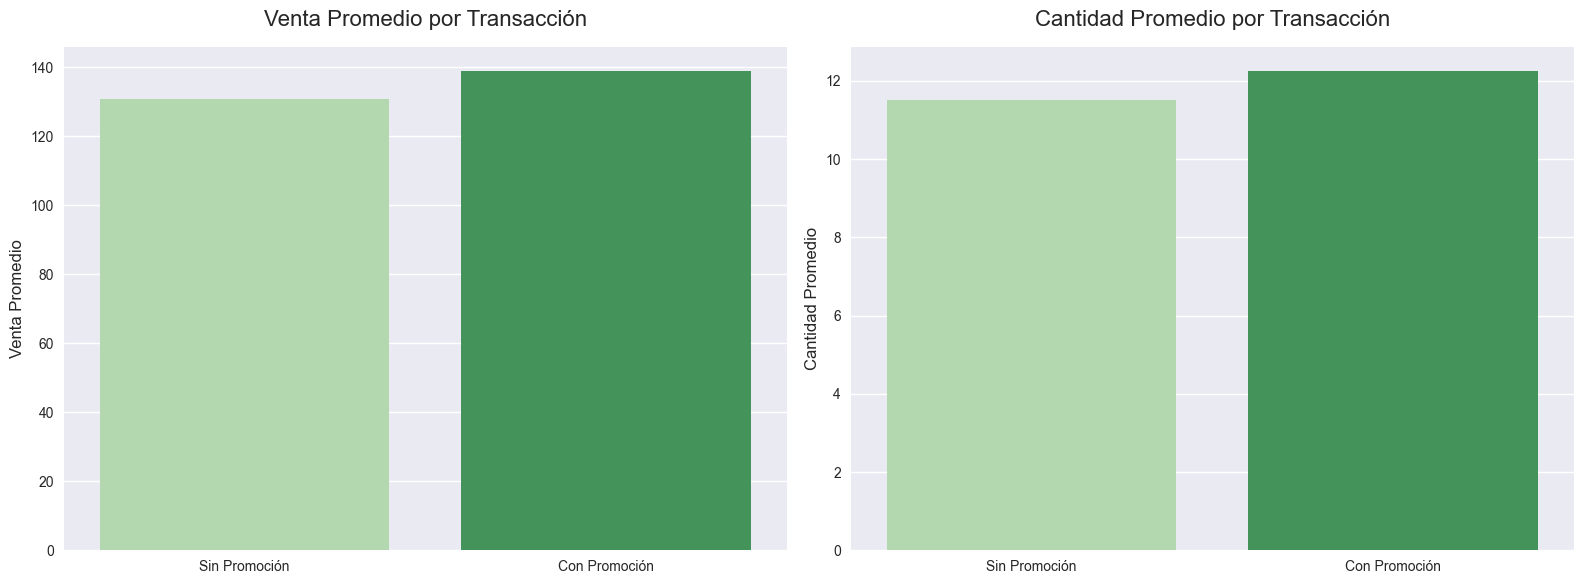

In [15]:
# Efectividad de promociones
print("Efectividad de promociones:")

# Comparar días con y sin promoción
promo_stats = df.groupby('promocion_activa').agg(
    venta_promedio=('total_venta', 'mean'),
    cantidad_promedio=('cantidad_vendida', 'mean'),
    frecuencia=('promocion_activa', 'count')
)

# Calcular incremento porcentual
incremento_venta = (promo_stats.loc[1, 'venta_promedio'] - promo_stats.loc[0, 'venta_promedio']) / promo_stats.loc[0, 'venta_promedio'] * 100
incremento_cantidad = (promo_stats.loc[1, 'cantidad_promedio'] - promo_stats.loc[0, 'cantidad_promedio']) / promo_stats.loc[0, 'cantidad_promedio'] * 100

# Mostrar resultados
print("\nComparación de días con y sin promoción:")
display(promo_stats.style.background_gradient(cmap='Greens'))

print(f"\nIncremento promedio con promociones:")
print(f"- Ventas: {incremento_venta:.1f}%")
print(f"- Cantidad vendida: {incremento_cantidad:.1f}%")

# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ventas promedio
sns.barplot(x=promo_stats.index.map({0: 'Sin Promoción', 1: 'Con Promoción'}), 
            y='venta_promedio', data=promo_stats, ax=ax1, palette='Greens') 
ax1.set_title('Venta Promedio por Transacción', pad=15)
ax1.set_ylabel('Venta Promedio')
ax1.set_xlabel('')

# Gráfico 2: Cantidad promedio
sns.barplot(x=promo_stats.index.map({0: 'Sin Promoción', 1: 'Con Promoción'}), 
            y='cantidad_promedio', data=promo_stats, ax=ax2, palette='Greens')
ax2.set_title('Cantidad Promedio por Transacción', pad=15)
ax2.set_ylabel('Cantidad Promedio')
ax2.set_xlabel('')

plt.tight_layout()
